In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
import pandas as pd

In [3]:
def detect_face(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    
    if (len(faces)==0):
        return None, None
    
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

In [4]:
def prepare_training_data(data_folder_path):
    
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    
    faces = []
    labels = []
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
        
        label=dir_name
        
        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)

        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            
            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;
            
            #build image path
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)
        
            #detect face
            face, rect = detect_face(image)

            if face is not None:
                faces.append(face)
                labels.append(label)
            
    
    return faces, labels

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [5]:
faces, labels = prepare_training_data("/Users/iuliia/cloud2/subjects/train")
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Total faces:  67
Total labels:  67


In [6]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
u, inx = np.unique(np.array(labels), return_inverse=True)
labels=list(inx)
labels=np.array(labels)

face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, labels)

def predict(img):

    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer 
    pred_label, confidence = face_recognizer.predict(face)
    confidence=100-float(confidence)
    
    if confidence<30:
        label='Unrecognized'

    else:
        label=u[pred_label]
        
    print (f'{label}; Confidence: {confidence:.2f}')
    
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    return label, round(confidence,2)

Unrecognized; Confidence: 24.48


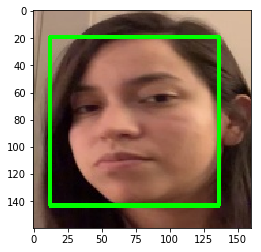

Unrecognized; Confidence: 19.20


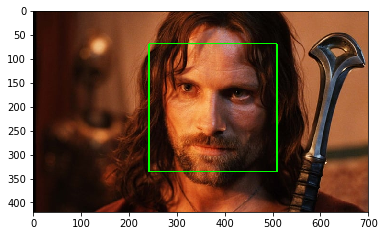

Joaquin; Confidence: 60.58


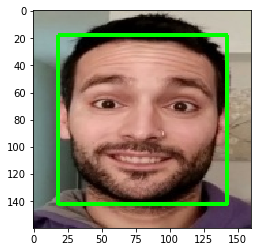

Joaquin; Confidence: 53.21


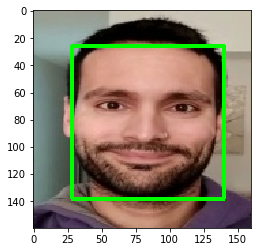

Joaquin; Confidence: 41.87


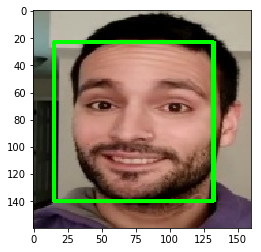

Unrecognized; Confidence: 3.00


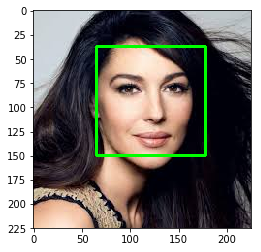

Joaquin; Confidence: 62.70


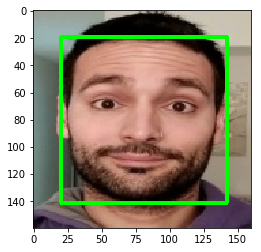

Unrecognized; Confidence: 14.85


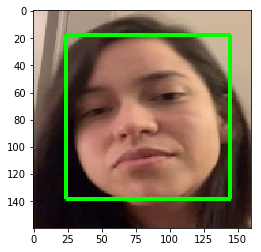

Joaquin; Confidence: 35.87


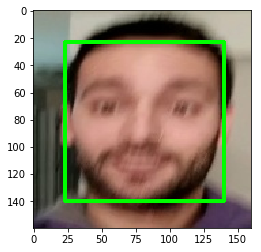

Joaquin; Confidence: 61.43


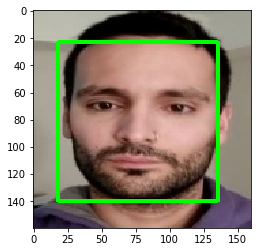

Iuliia; Confidence: 38.60


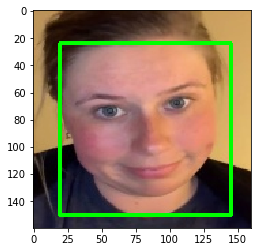

Unrecognized; Confidence: 19.93


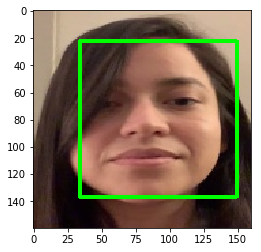

Joaquin; Confidence: 55.88


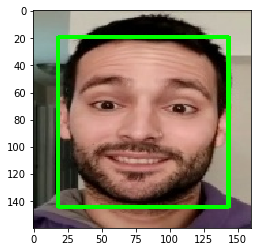

Joaquin; Confidence: 51.05


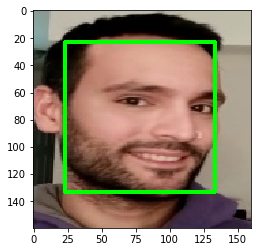

Iuliia; Confidence: 40.14


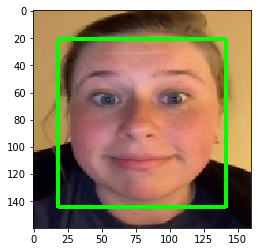

Unrecognized; Confidence: 5.74


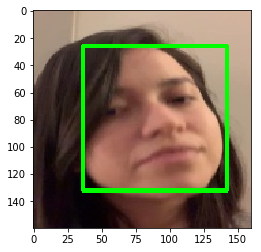

Joaquin; Confidence: 53.36


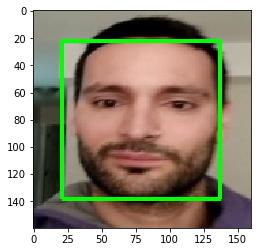

Unrecognized; Confidence: 12.48


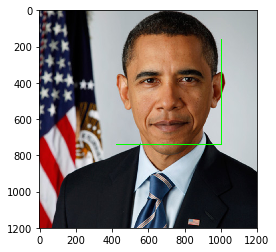

Unrecognized; Confidence: 20.49


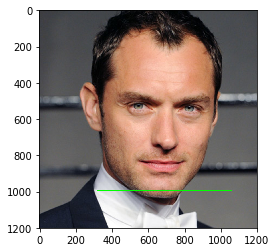

Unrecognized; Confidence: 21.01


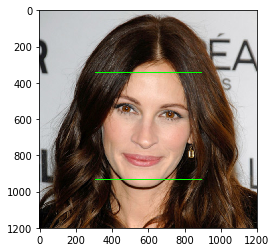

Iuliia; Confidence: 42.77


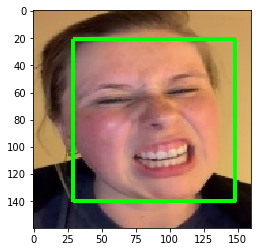

Joaquin; Confidence: 60.83


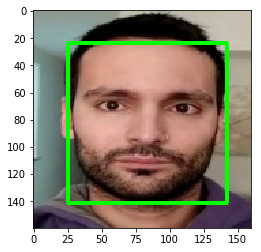

Joaquin; Confidence: 45.32


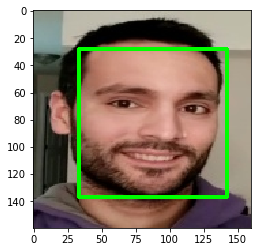

Joaquin; Confidence: 51.45


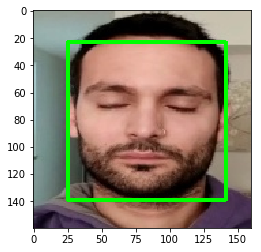

Azucena; Confidence: 49.99


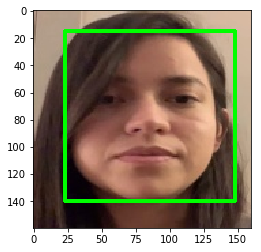

Unrecognized; Confidence: 29.36


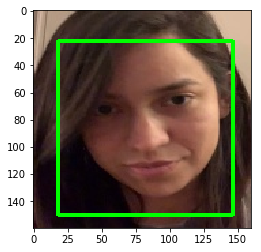

Joaquin; Confidence: 53.66


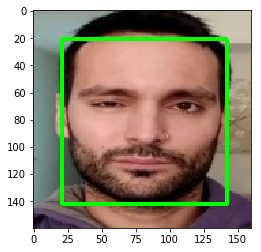

Azucena; Confidence: 38.02


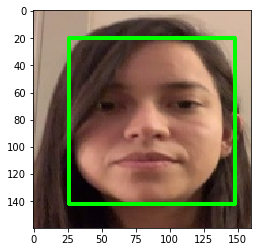

In [7]:
test_dir='/Users/iuliia/cloud2/subjects/test/'
dirs = os.listdir(test_dir)

predicted_labels=[]
true_labels=[]
for dir_name in dirs:
    
    direct=test_dir+str(dir_name)
    if direct=='/Users/iuliia/cloud2/subjects/test/.ipynb_checkpoints':
        pass
    else:
        test_img=cv2.imread(test_dir+str(dir_name))
    
        face, rect = detect_face(test_img)
        if face is None:
            pass
        else:
            label=dir_name.split('_')[0]
            true_labels.append(label)
            predicted_labels.append(predict(test_img))

In [8]:
count=0
pred_labels=[x[0] for x in predicted_labels]
for true, pred in zip(true_labels, pred_labels):
    if true==pred:
        count+=1
print ('Accuracy:', round(count/len(true_labels),2))

Accuracy: 0.82
